# Data Exploration and Preprocessing

Data exploration is about getting a feel for the data (and the problem).
We preprocess it to facilitate subsequent modeling steps.


## Some Questions to Ask
- What kind of variable types are present?
- Is any data missing?
- Is the data set balanced?
- Are input variables correlated?
- Are there any obvious patterns, i.e. relationships between input variables and output?
- ...

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from util import DATA_PATH_RAW, DATA_PATH_PREPROCESSED

%matplotlib inline

## Parsing

In [2]:
df_orig = pd.read_csv(DATA_PATH_RAW, index_col=0)
df_orig.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Index,,,,,,,,,,,,,,
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [3]:
df_orig.describe().style

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303,303,303,303,303,303,303,303,303,303,299
mean,54.4389,0.679868,131.69,246.693,0.148515,0.990099,149.607,0.326733,1.0396,1.60066,0.672241
std,9.03866,0.467299,17.5997,51.7769,0.356198,0.994971,22.875,0.469794,1.16108,0.616226,0.937438
min,29,0,94,126,0,0,71,0,0,1,0
25%,48,0,120,211,0,0,133.5,0,0,1,0
50%,56,1,130,241,0,1,153,0,0.8,2,0
75%,61,1,140,275,0,2,166,1,1.6,2,1
max,77,1,200,564,1,2,202,1,6.2,3,3


In [4]:
numerical = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
categorical_text = ['ChestPain', 'Thal']
categorical_numeric = ['Sex', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca']
# we do not differentiate between nominal and ordinal
features = numerical + categorical_numeric + categorical_text
target = 'AHD'

## Exploration

In [5]:
df_orig[target].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [6]:
df_orig.groupby(target).mean().style.format('{:.2f}').background_gradient(axis=0)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
AHD,,,,,,,,,,,
No,52.59,0.56,129.25,242.64,0.14,0.84,158.38,0.14,0.59,1.41,0.27
Yes,56.63,0.82,134.57,251.47,0.16,1.17,139.26,0.55,1.57,1.83,1.14


In [7]:
df_tmp = (df_orig.filter(items=numerical + [target])
                 .melt(id_vars=[target], value_vars=numerical, value_name='value', var_name='feature'))
df_tmp.head()

,AHD,feature,value
0,No,Age,63.0
1,Yes,Age,67.0
2,Yes,Age,67.0
3,No,Age,37.0
4,No,Age,41.0


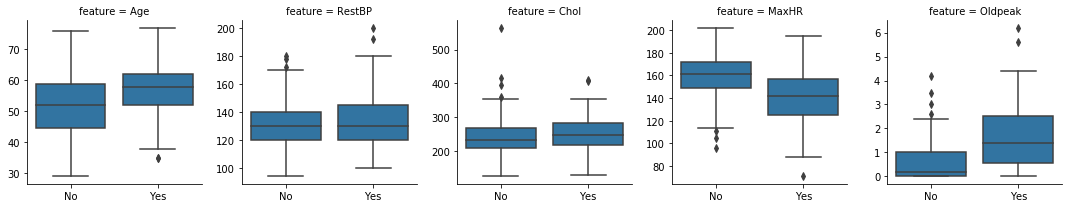

In [8]:
g = sns.FacetGrid(col='feature', data=df_tmp, sharey=False)
g.map_dataframe(sns.boxplot, y='value', x=target)

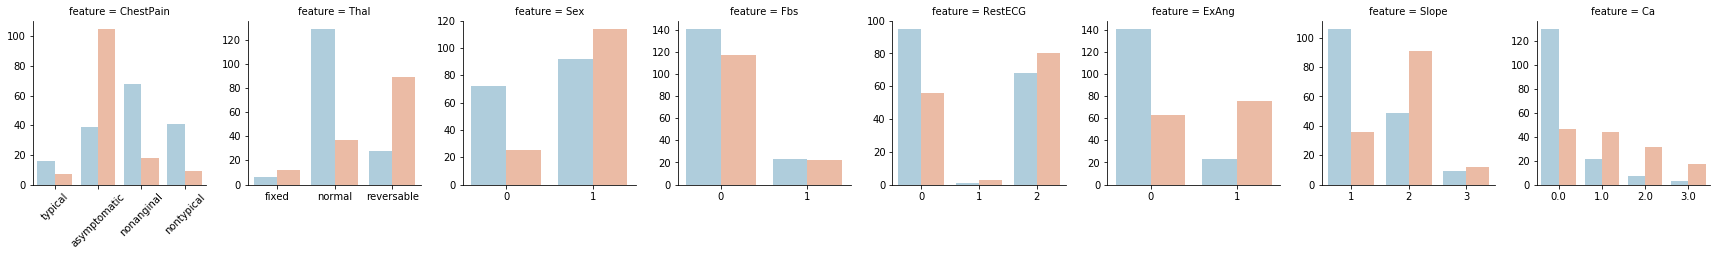

In [9]:
df_tmp = (df_orig.filter(items=categorical_text + categorical_numeric + [target])
                 .melt(id_vars=[target], value_vars=categorical_text + categorical_numeric, value_name='value', var_name='feature'))

g = sns.FacetGrid(col='feature', data=df_tmp, sharey=False, sharex=False)
g.map_dataframe(sns.countplot, x='value', hue=target, palette='RdBu_r')

# rotate in first figure
xticklabels = g.axes[0][0].get_xticklabels()
for xtl in xticklabels:
    xtl.set_rotation(45)

## Preprocessing

In [10]:
df = df_orig.copy()
for name in [target] + categorical_numeric + categorical_text:
    values, _ = df[name].factorize(sort=True)
    df[name] = values

display(df_orig.head(3))
df.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Index,,,,,,,,,,,,,,
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
Index,,,,,,,,,,,,,,
1,63,1,3,145,233,1,2,150,0,2.3,2,0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,1,3,1,1
3,67,1,0,120,229,0,2,129,1,2.6,1,2,2,1


In [11]:
df.to_csv(DATA_PATH_PREPROCESSED, index=False)